# Computer-aided diagnosis: Risk Factors for Heart Diseases

Source: https://www.kaggle.com/volodymyrgavrysh/heart-disease

Aim: build the best classifier for computer-aided diagnose of heart diseases using only 13 medical features.

### Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Import Data

In [2]:
data = pd.read_csv('./heart.csv')

In [3]:
data.columns #check features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Attribute Information:
Age: Age
Sex: Sex (1 = male; 0 = female)
ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
RestBP: Resting blood pressure
Chol: Serum cholestoral in mg/dl
Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
RestECG: Resting electrocardiographic results
MaxHR: Maximum heart rate achieved
ExAng: Exercise induced angina (1 = yes; 0 = no)
Oldpeak: ST depression induced by exercise relative to rest
Slope: Slope of the peak exercise ST segment
Ca: Number of major vessels colored by flourosopy (0 - 3)
Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)
Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Data Set Information:

This database contains attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Description 

#### General

In [4]:
data.sort_values('age').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [5]:
data.isnull().sum().sum() #no NaN

0

In [6]:
data.describe() #all patients description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Healthy

In [7]:
healthy = data[data['target']==0]
healthy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


#### Ill

In [8]:
ill = data[data['target']==1]
ill.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


## Building Classification Models

In [9]:
patient_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

#### Train/Test split

In [10]:
X = data[patient_features].copy()
y = data['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

### Decision Tree

#### Finding best number of leaf nodes

In [69]:
Accuracies = []
for i in np.arange(2,30):
    heart_classifier = DecisionTreeClassifier(max_leaf_nodes=i, max_depth=7,random_state=0)
    heart_classifier.fit(X_train, y_train)
    predictions = heart_classifier.predict(X_test)
    AccuracyMLNiR0 = accuracy_score(y_true = y_test, y_pred = predictions)*100
    Accuracies.append(AccuracyMLNiR0)

Text(0, 0.5, 'Accuracy (%)')

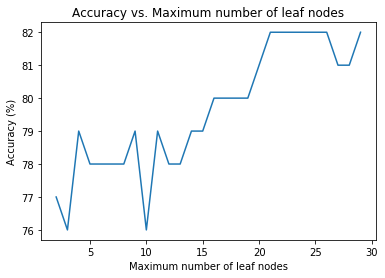

In [70]:
%matplotlib inline
plt.plot(np.arange(2,30),Accuracies)
plt.title('Accuracy vs. Maximum number of leaf nodes')
plt.xlabel('Maximum number of leaf nodes')
plt.ylabel('Accuracy (%)')

#### Final Decision Tree

In [68]:
final_heart_classifier = DecisionTreeClassifier(max_leaf_nodes=21, max_depth = 7, random_state=0)
final_heart_classifier.fit(X_train, y_train)
final_predictions = final_heart_classifier.predict(X_test)
decision_tree_accuracy = accuracy_score(y_true = y_test, y_pred = final_predictions)*100
decision_tree_accuracy

82.0

### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Rforest_model = RandomForestRegressor(random_state=1)
Rforest_model.fit(X_train, y_train)
Rforest_predictions = Rforest_model.predict(X_test)
Rforest_error = mean_absolute_error(y_test, Rforest_predictions)
Rforest_accuracy = (1-Rforest_error)*100
Rforest_accuracy

74.83999999999999

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [73]:
AccuraciesC = []
for i in np.arange(2,30):
    Cforest_model = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=i, random_state=11 )
    Cforest_model.fit(X_train, y_train)
    Cforest_predictions = Cforest_model.predict(X_test)
    Cforest_accuracy_i = metrics.accuracy_score(y_test, Cforest_predictions)*100
    AccuraciesC.append(Cforest_accuracy_i)

Text(0, 0.5, 'Accuracy (%)')

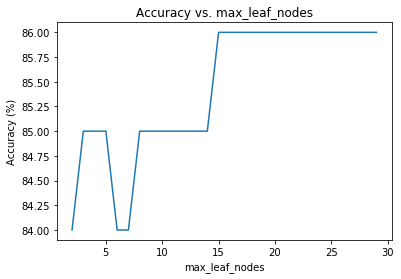

In [75]:
%matplotlib inline
plt.plot(np.arange(2,30),AccuraciesC)
plt.title('Accuracy vs. max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy (%)')

In [76]:
final_Cforest_model = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=15,random_state=11)
final_Cforest_model.fit(X_train, y_train)
final_Cforest_predictions = final_Cforest_model.predict(X_test)
final_Cforest_accuracy = metrics.accuracy_score(y_test, final_Cforest_predictions)*100
final_Cforest_accuracy

86.0

## Conclusion

The best choice seems to be a Random Forest Classifier with n_estimators=100, max_depth=5, max_leaf_nodes=15 and random_state=11, giving us an accuracy of 86%.